In [2]:
#소스코드 링크: https://github.com/sr6033/Deep-learning-model-for-stock-price-prediction

#import 하는 라이브러리들을 간단한 축약 용어로 import 해줌
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# import data
data = pd.read_csv('data_stocks.csv')

# drop the data
# pandas의 drop은 하나의 행 또는 열 삭제
# Data.drop( list, axis=0/1)
# drop 하고자 하는 행의 색인, 열의 이름을 값이나 list로 입력하며 axis=1이면 열을 drop 하는 것으로 함
# defualt는 행(0)임
data = data.drop(['DATE'], 1)
# data 내부에 ['DATE']라는 첫번째 열 삭제

# dimensions of dataset
# 사용하고자 하는 데이터의 크기를 확인하는데 사용

n = data.shape[0] #행의 갯수
p = data.shape[1] #열의 갯수

print("Dimensions of [0] is", n)
print("Dimensions of [1] is", p)

# make data as numpy array
data = data.values
# 기존 엑셀 파일의 첫번째 행을 key로 인식해 dictionary type으로 생각해, 
# values를 불러왔을 때 첫번째 행을 제외한 값들을 numpy array형식으로 받음

print("data")
print(data)

Dimensions of [0] is 41266
Dimensions of [1] is 501
data
[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]


In [4]:
# training and testing data

train_start = 0
train_end = int(np.floor(0.8*n)) # 파이썬 올림(ceil), 내림(floor), 반올림(round)
                                 # int: integer
test_start = train_end
test_end = n

#총 n (csv 파일의 행의수) 개의 데이터 중에 대략 80퍼센트를 train data 로 사용

# numpy의 arrange 함수
# numpy.arange([start, ] stop, [step, ] dtype=None)
# :start와 stop에 step의 크기만큼 일정하게 떨어져 있는 숫자들을 array 형태로 반환
# :stop 값은 반드시 명시되어야 하며, start와 step은 지정하지 않으면 각각 0과 1을 default로 가짐.

data_train = data[np.arange(train_start, train_end), :] # 슬라이싱을 이용해 train end 지점까지의 데이터를 행렬형식으로 모두 받음.
data_test = data[np.arange(test_start, test_end), :]

# 구체적으로 현재 코드에서 np.arrange가 어떻게 쓰였는지 확인하기 위해 추가

print("np.arange(train_start, train_end) is", '\n')
print(np.arange(train_start, train_end), '\n')

print("data_train is", '\n')
print(data_train, '\n')
print("data_test is", '\n')
print(data_test)
 
# 여기까지는 임의의 값 n에 대한 정의가 없다. 나중에 지정해주나보다/// n 은 전 n = data.shape[0] #행의 갯수로 정의함

np.arange(train_start, train_end) is 

[    0     1     2 ... 33009 33010 33011] 

data_train is 

[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2475.05     50.54    158.0143 ...   76.37    117.8688   61.535 ]
 [2474.8601   50.52    157.8701 ...   76.35    117.91     61.52  ]
 [2474.6201   50.52    157.8    ...   76.335   117.83     61.54  ]] 

data_test is 

[[2474.9399   50.48    157.88   ...   76.33    117.75     61.53  ]
 [2474.73     50.4799  157.8236 ...   76.37    117.75     61.52  ]
 [2474.55     50.49    157.7841 ...   76.36    117.73     61.5   ]
 ...
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]


In [5]:
# scikit-learn의 전처리 기능
# 스케일링(scale): 모든 자료에 선형 변환을 적용해 전체 자료 분포를 평균 0, 분산 1이 되도록 만들어줌. 
# 최적화 과정에서 안정성 및 수렴 속도를 향상시키는 장점
# StandardScaler(x): 평균이 0과 표준편차가 1이 되도록 변환
# RobustScaler(x): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환
# MinMaxScaler(x): 최댓값이 각각 1, 최솟값이 0이 되도록 변환
# MaxAbsScaler(x): 0을 기준으로 절댓값이 가장 큰수가 1 또는 -1이 되도록 변환
# 참고 링크: https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/

# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # MinMaxScaler를 통해 데이터 1~0 사잇값으로 변환



#scaler.fit(data_train) # fit 함수를 통해 분포 모수를 객체 내에 저장, 데이터가 0과 1사이 값으로 바뀜
scaler.fit(data_test)

print("scaler.fit(data_train) is", '\n', scaler.fit(data_train), '\n') 

print("data_train is", '\n',data_train, '\n')


data_train = scaler.transform(data_train) # transform 함수를 통해 data를 변환
data_test = scaler.transform(data_test)

print("scaler.transform(data_train) is", '\n')
print(scaler.transform(data_train), '\n')

print( "new data_train is", '\n',data_train, '\n')
print("scaler.transform(data_test) is", '\n')

print(scaler.transform(data_test), '\n')
print("new data_train is", '\n',data_test, '\n')

#궁금한점? data_train은 fit 과정을 거치면서 왜 data_test는 fit 과정을 거치지 않았을까?
# MinMaxScaler.fit 과정에서 data_train 의 최대 최솟값을 0, 1 로 정의하게 되는데, 이값을 레퍼런스로 사용해야하기때문임
# data_test 도 fit 을 해버리면 0과 1사이의값을 가지게 될거고 데이터가 왜곡됨.
# 이라고 생각했지만 scaler.fit(data_train) 을 scaler.fit(data_test) 로 바꾸고 실행해도 결과가 똑같음;; 멘붕
# 했지만 엄청난 노가다후에 print 안에있는 print(scaler.fit(data_train) 자체가 프린트만하는게 아니라 걍 scaler.fit 을실행시켜버린다는걸 알게됨
#print(scaler.fit(data_test) 로 바꾸면 결과가 data_test 에 피팅되어있는걸 확인할 수 있음

#궁금한점? 왜 print (scaler.transform(data_test)) 와 print(data_test) 가 다르지.. cell run 한번 더하면 같아지는데 그건왜지


scaler.fit(data_train) is 
 MinMaxScaler(copy=True, feature_range=(0, 1)) 

data_train is 
 [[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2475.05     50.54    158.0143 ...   76.37    117.8688   61.535 ]
 [2474.8601   50.52    157.8701 ...   76.35    117.91     61.52  ]
 [2474.6201   50.52    157.8    ...   76.335   117.83     61.54  ]] 

scaler.transform(data_train) is 

[[-15.14936997  -2.98424841  -7.20426335 ...  -4.76802421  -6.25596066
   -4.52417783]
 [-15.14934923  -2.98408729  -7.20421037 ...  -4.76870876  -6.25664446
   -4.52417783]
 [-15.14940933  -2.98435583  -7.20423659 ...  -4.76865171  -6.25685257
   -4.52406519]
 ...
 [-15.14465452  -2.94015273  -7.1662942  ...  -4.69665985  -6.2682429
   -4.46271577]
 [-15.14466256  -2.94026015  -7.16667616 ...  -4.69677394  -6.26812041
   -4.46282841]
 [-15.14467272  -2.940260

In [6]:
# build X & Y
X_train = data_train[:, 1:] # 1: (슬라이싱) 1을 기준으로 오른쪽으로 슬라이싱 한다는 뜻
Y_train = data_train[:, 0]
X_test = data_test[:, 1:]
Y_test = data_test[:, 0]

#Y 가 주식 가격 X 는 가격에 영향을 미치는 다양한 변수들

In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
#tesorflow.placeholder 의 에러를 풀기위한 라인

# Tensorflow의 Tensor란? 데이터의 배열 (Array)
# Tensor에 대해 더 궁금하다면 : https://m.blog.naver.com/PostView.nhn?blogId=complusblog&logNo=221237818389&proxyReferer=https%3A%2F%2Fwww.google.com%2F

# tensorflow의 데이터 근원 
# 플레이스 홀더 이외 나머지 참고 링크: https://datascienceschool.net/view-notebook/5cbab09d777841f591a67928d7043f51/
# 1. 상수형(Constant): 미리 주어진 값으로 고정된 텐서
# 2. 변수형(Variable): 세션 내에서 값이 바뀔수 있는 텐서
# 3. 플레이스홀더(Placeholder): 고정된 값을 가지지만 값이 미리 주어지지 않고 나중에 넣을 수 있음.
#   예시코드
#   x=tf.placeholder(dtype=tf.int32, shape=(None, 10)) => 행의 갯수는 미정, 열의 갯수는 10개

# Model architecture parameters

n_stocks = 500 # 입력값의 노드는 입력 데이터의 갯수와 일치하게 설정 (정답을 제외한 1열을 빼면 500개)
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1
# 히든 노드의 구성 (원하는 대로 설정하면됨)
# 500개 입력 -> 1024개의 첫번째 뉴런 -> 512개의 두번째 뉴런 -> 256개의 세번째 뉴런 -> 128개의 4번째 뉴런 -> 1개의 output

# Placeholder: 차후 임의의 값을 입력으로 받기 위한 정의
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
# X는 float32라는 형식의 데이터 타입을 가지며, 구조는 행의 갯수는 미정, 열의 갯수는 n_stocks 만큼 가짐.
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1

weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)

print("weight_initializer is", "\n", weight_initializer)

bias_initializer = tf.zeros_initializer()

print("bias_initializer is", "\n", bias_initializer)

# 뭔진 모르겠지만 텐서플로우를 사용할때 파라미터 초기화 방법들이다. (나도)


weight_initializer is 
bias_initializer is 


In [19]:
# tf.Variable을 통해 변수 생성, 이때 이전에 만들어준 initializer 사용
# tf.Variable(변수노드)은 가중치나 바이어스 처럼 계속 업데이트 되는 경우 사용

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [26]:
# 렐루(ReLu, Rectified linear unit) 활성화 함수: 최근 딥 뉴럴 네트워크 히든레이어의 기본 활성화 함수
# max(0,x)으로 음수의 경우 0을 리턴하고 그 외에는 x를 리턴함.
# ReLu vs. sigmoid => ReLu는 경사도가 사라지는 문제를 해결할 수 있어서 이 함수 사용
# ReLu vs sigmoid 2: https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
# tf.matmul: 3차원 이상의 텐서사이의 행렬곱
# hidden_1은 결과적으로 머신러닝에서 y=X*W+b를 나타낸다는 것을 알 수 있음. 


hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# 최종 가중치와 바이어스를 계산한 output value (손실함수값)
# 이 값이 최소가 되면 학습종료.



In [27]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))
# Training 과정에서 정답과 계산값의 차이 (오차)

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)
# Gradient Descent Algorithm: 오차값을 최소화 하기위한 함수

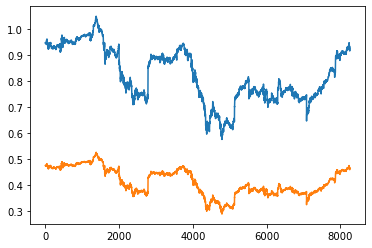

0.0073657455


In [28]:
# TensorFlow에서 텐서(Tensor) 계산 과정은 모두 그래프(Graph)라고 부르는 객체 내에 저장된다.
# 그래프를 계산하려면 외부 컴퓨터에 이 그래프 정보를 전달하고 그 결과값을 받아야 한다. 
# 그 통신과정을 담당하는 것이 세션(Session)이라고 부르는 객체이다.

# 세션(Session) : 계산 그래프 생성 및 값 계산을 위한 환경 제공
# 세션 생성 : Session
# 세션 사용: run
# 세션 종료: close

# sess.run(실행하고자하는 연산(플레이스홀더), feed_dict={a:a.0, b:3.0})
# 플레이스 홀더 노드에 실제 값을 넣어 줄때 feed_dict을 통해 dictionary 타입으로 값을 넣어줌. 

# Make Session
net = tf.Session()

# Run initializer (변수노드 초기화)
net.run(tf.global_variables_initializer())
# 이전에 tf.Variable을 통해 변수노드를 생성했을 경우, 반드시 변수노드 값 초기화가 필요



# Setup interactive plot
plt.ion() # interactive-on: 매번 그림을 갱신하고 싶을때
fig = plt.figure() 
ax1 = fig.add_subplot(111)
line1, = ax1.plot(Y_test)
line2, = ax1.plot(Y_test*0.5)
plt.show()

# Number of epochs and batch size
epochs = 10  # 반복횟수
batch_size = 256 # 한번에 입력으로 주어지는 데이터의 갯수

for e in range(epochs):

    # Shuffle training data (데이터가 순서대로 들어가는 것을 막기 위해 데이터를 섞어줌)
    shuffle_indices = np.random.permutation(np.arange(len(Y_train))) # 대소문자 바껴도 못알아 먹는다..
    X_train = X_train[shuffle_indices]
    Y_train = Y_train[shuffle_indices]

    # Minibatch training (Mini-batch gradient descent(MSGD))
    # 데이터 중에 일부 데이터만 뽑아서 기울기를 구한 다음 평균값을 내는 방식
    # 참고 링크 : https://light-tree.tistory.com/133
    for i in range(0, len(Y_train) // batch_size):   # len(): 데이터의 크기 나타내는 함수
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = Y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress (이거 제대로 안나오는데 지금 수정할 시간이 없다 그래서 그냥 없애버렸다.)
#        if np.mod(i, 5) == 0:
#            # Prediction
#            pred = net.run(out, feed_dict={X: X_test})
#            line2.set_ydata(pred)
#            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#            file_name = 'epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
#            plt.savefig(file_name)
#            plt.pause(0.01)
      
            
            
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: Y_test})
print(mse_final)
net.close()